#TP Minería de Datos
Grupo No. 5
Sara Lucero
Vanesa Cabrera



#Fase 1
Objetivo del Negocio:
Determinar los pacientes posibles clientes en adquirir un plan de salud integral.
¿Qué grupos de pacientes existen?"

DESCRIPCIÓN METODOLÓGICA DEL ANÁLISIS
El presente análisis se realizará sobre un dataset en formato Excel conteniendo datos reales de pacientes relacionados con hábitos de sueño, actividad física y métricas de salud. Las variables principales incluyen: duración del sueño, calidad del sueño, nivel de actividad física, nivel de estrés, frecuencia cardíaca, cantidad de pasos diarios y presencia de trastornos del sueño. Se implementará una metodología de análisis en dos fases complementarias. En la primera fase, se aplicará el algoritmo K-Means para agrupar a los pacientes en de acuerdo a las características que presenten. Este algoritmo fue seleccionado debido a que la mayoría de las variables son numéricas y K-Means es altamente eficiente para identificar patrones y agrupaciones naturales en este tipo de datos sin necesidad de etiquetas previas (aprendizaje no supervisado). El propósito es identificar perfiles de pacientes en función de la similitud de características que detecte el algoritmo. Previo a la aplicación de K-Means, se realizará la normalización y estandarización de las variables y se determinará el número óptimo de clusters mediante el método del codo y el coeficiente de silueta. En la segunda fase, se utilizará el algoritmo Apriori para descubrir reglas de asociación entre variables, con el objetivo específico de identificar relaciones y patrones entre la deficiencia de sueño y otros factores de salud como la baja actividad física o el alto nivel de estrés. Para ello, las variables numéricas se discretizarán en categorías significativas (por ejemplo, sueño deficiente/normal/excelente, actividad física baja/media/alta, estrés bajo/medio/alto), permitiendo así extraer reglas del tipo "Si un paciente tiene baja actividad física Y alto estrés, entonces presenta sueño deficiente". Las reglas se evaluarán mediante métricas de soporte, confianza y lift para determinar su relevancia. La integración de ambos análisis permitirá no solo segmentar a los pacientes en grupos de riesgo, sino también comprender las relaciones subyacentes entre variables, facilitando el diseño de intervenciones personalizadas y estrategias de prevención basadas en evidencia para cada perfil identificado.

#Fase 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1- Carga de datos, librerías necesarias y definición del caso

In [16]:
"""
=============================================================================
PROYECTO DE DATA SCIENCE
K-Means Clustering + Apriori Association Rules
=============================================================================

Autores: Sara Lucero y Vanesa Cabrera
Fecha: Noviembre 2025
Dataset: Sleep_health_and_lifestyle_dataset.csv
"""

print("FASE 1: DEFINICIÓN DEL CASO Y CARGA DE DATOS")
# Objetivo de Negocio
print("\n OBJETIVO DE NEGOCIO:")
print("Identificar segmentos de pacientes con patrones de sueño similares para")
print("personalizar intervenciones de salud y prevenir trastornos del sueño.\n")

# Pregunta de Investigación
print(" PREGUNTA DE INVESTIGACIÓN:")
print("¿Qué grupos de pacientes existen según sus hábitos de sueño, actividad")
print("física y niveles de estrés? ¿Qué asociaciones existen entre estos factores")
print("y los trastornos del sueño?\n")

#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
from scipy import stats # Import stats for potential z-score use
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ==============================================================================
# 1. CARGA Y PREPARACIÓN DE DATOS
# ==============================================================================

# Cargar datos (ajusta la ruta a tu archivo)
df_original = pd.read_csv('/content/drive/MyDrive/Minería de datos/Sleep_health_and_lifestyle_dataset.csv')
df = df_original.copy() # Create copy early for consistent use

print(f"\n Dataset cargado: {df.shape[0]} registros, {df.shape[1]} columnas")
print("\nPrimeras filas:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print(f"Dataset cargado exitosamente")

print(f"\n Estadísticas descriptivas:")
print(df_original.describe())

FASE 1: DEFINICIÓN DEL CASO Y CARGA DE DATOS

 OBJETIVO DE NEGOCIO:
Identificar segmentos de pacientes con patrones de sueño similares para
personalizar intervenciones de salud y prevenir trastornos del sueño.

 PREGUNTA DE INVESTIGACIÓN:
¿Qué grupos de pacientes existen según sus hábitos de sueño, actividad
física y niveles de estrés? ¿Qué asociaciones existen entre estos factores
y los trastornos del sueño?


 Dataset cargado: 374 registros, 13 columnas

Primeras filas:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42       

#2- Preprocesamiento de datos


 2.1 ANÁLISIS DE VALORES NULOS:
Sleep Disorder    219
dtype: int64
 Se encontraron 219 valores nulos
  ✓ Valores nulos en 'Sleep Disorder' llenados con 'Sin Trastorno'.

 Distribution of 'Sleep Disorder' after filling nulls:
Sleep Disorder
Sin Trastorno    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64

  Variable binaria 'Has_Sleep_Disorder' creada:
    Sin trastorno (0): 219
    Con trastorno (1): 155

 2.2 ANÁLISIS DE DUPLICADOS:
  - Duplicados encontrados: 0
 No se encontraron duplicados
DETECCIÓN Y TRATAMIENTO DE OUTLIERS

📊 Análisis de outliers por variable (Método IQR):

  Sleep Duration:
    - Outliers detectados: 0 (0.00%)
    - Límite inferior: 4.30
    - Límite superior: 9.90
    - Rango: [5.80, 8.50]

  Quality of Sleep:
    - Outliers detectados: 0 (0.00%)
    - Límite inferior: 3.00
    - Límite superior: 11.00
    - Rango: [4.00, 9.00]

  Physical Activity Level:
    - Outliers detectados: 0 (0.00%)
    - Límite inferior: 0.00
    - Límite super

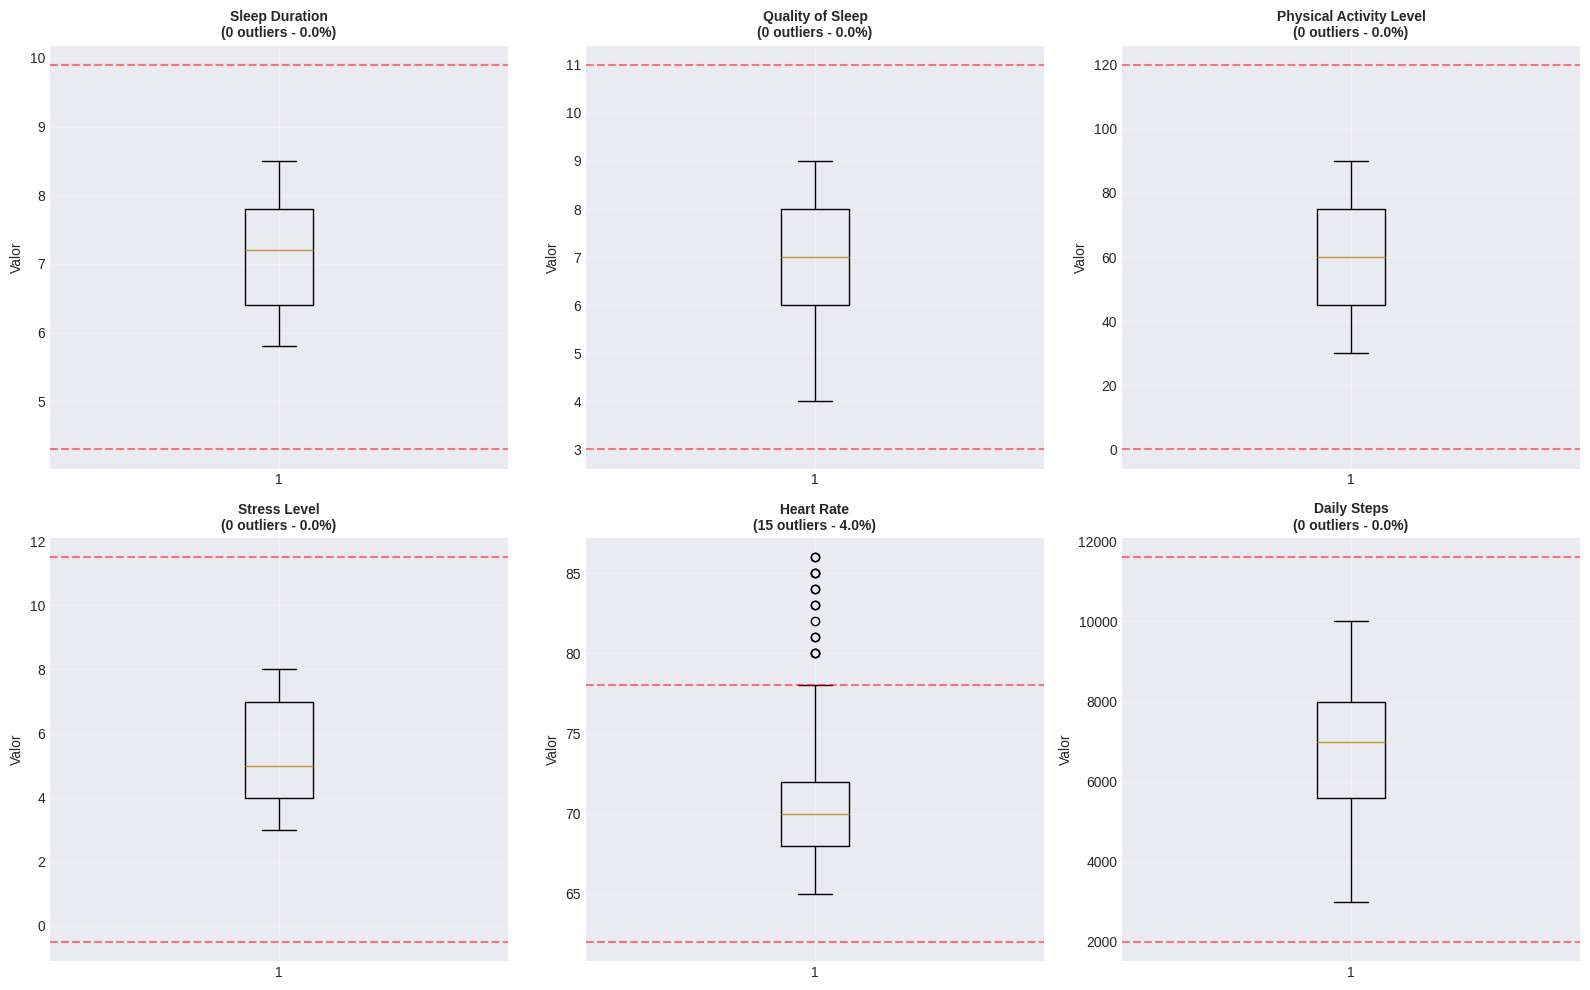

✓ Gráfico guardado: 00_outliers_distributions.png


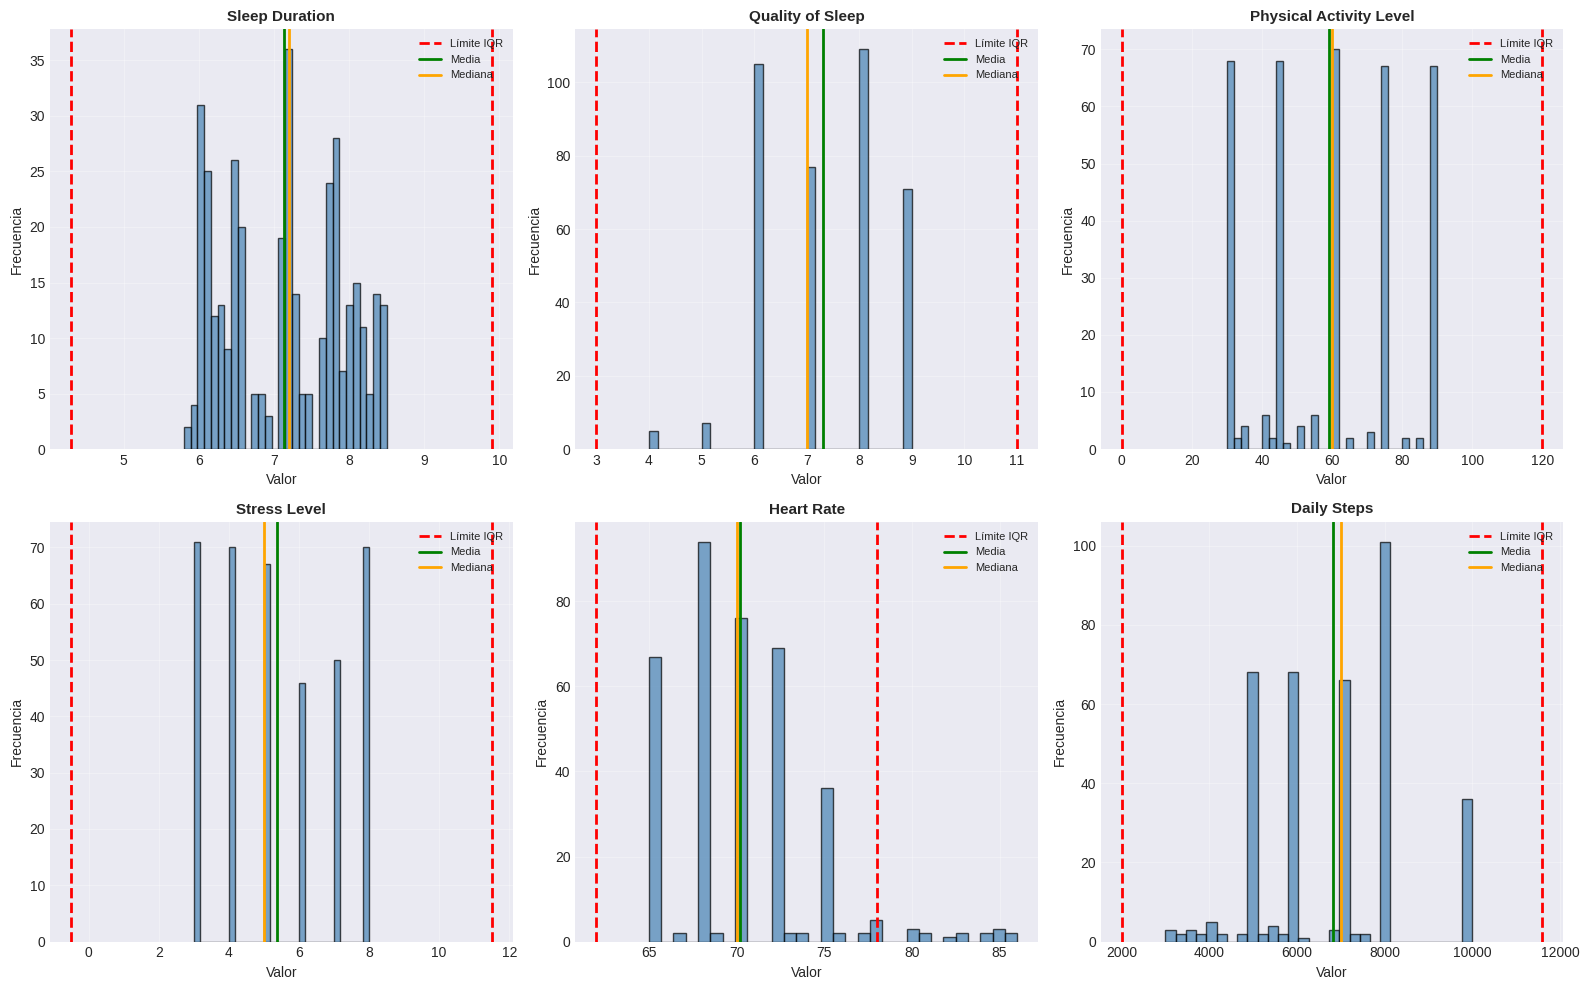


🔧 Estrategia de tratamiento de outliers:

OPCIÓN 1: Eliminar outliers extremos (se aplicará)
  - Se eliminarán registros con outliers en múltiples variables
  - Criterio: registros con outliers en 2 o más variables

📊 Distribución de outliers por registro:
outlier_count
0    359
1     15
Name: count, dtype: int64

✓ Registros eliminados: 0 (0.00%)
✓ Registros restantes: 374 (100.00%)

OPCIÓN 2: Winsorización (NO aplicada, pero disponible)
  - Reemplazar outliers con percentiles 5 y 95
  - Conserva todos los registros pero limita valores extremos


In [17]:
# 2.1 Detección y manejo de valores nulos
print("\n 2.1 ANÁLISIS DE VALORES NULOS:")
nulls_before = df.isnull().sum()
print(nulls_before[nulls_before > 0])

if df.isnull().sum().sum() > 0:
    print(f" Se encontraron {df.isnull().sum().sum()} valores nulos")
    # Handling nulls in 'Sleep Disorder' by filling with 'Sin Trastorno'
    if 'Sleep Disorder' in df.columns and df['Sleep Disorder'].isnull().sum() > 0:
        df['Sleep Disorder'].fillna('Sin Trastorno', inplace=True)
        print(f"  ✓ Valores nulos en 'Sleep Disorder' llenados con 'Sin Trastorno'.")

# Added line to explicitly show the distribution after filling nulls
    print("\n Distribution of 'Sleep Disorder' after filling nulls:")
    print(df['Sleep Disorder'].value_counts(dropna=False))

    # Dropping remaining nulls if any in other columns
    if df.isnull().sum().sum() > 0:
        # As per methodological description, drop rows with nulls in other columns
        initial_rows = len(df)
        df = df.dropna()
        removed_rows = initial_rows - len(df)
        print(f"  ✓ Se eliminaron {removed_rows} registros con valores nulos en otras columnas. Registros restantes: {len(df)}")

else:
    print(" No se encontraron valores nulos")

# Create binary variable for Sleep Disorder (0 for 'Sin Trastorno', 1 otherwise)
if 'Sleep Disorder' in df.columns:
    df['Has_Sleep_Disorder'] = df['Sleep Disorder'].apply(
        lambda x: 0 if x == 'Sin Trastorno' else 1
    )
    print(f"\n  Variable binaria 'Has_Sleep_Disorder' creada:")
    print(f"    Sin trastorno (0): {(df['Has_Sleep_Disorder'] == 0).sum()}")
    print(f"    Con trastorno (1): {(df['Has_Sleep_Disorder'] == 1).sum()}")


# 2.2 Detección y manejo de duplicados
print("\n 2.2 ANÁLISIS DE DUPLICADOS:")
duplicates = df.duplicated().sum()
print(f"  - Duplicados encontrados: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f" Duplicados eliminados. Registros restantes: {len(df)}")
else:
    print(" No se encontraron duplicados")


# ==============================================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# ==============================================================================
print("DETECCIÓN Y TRATAMIENTO DE OUTLIERS")

# Define numerical columns BEFORE using them
numeric_cols = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                'Stress Level', 'Heart Rate', 'Daily Steps']

# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Función para detectar outliers usando Z-score (currently not used)
# def detect_outliers_zscore(data, column, threshold=3):
#     z_scores = np.abs(stats.zscore(data[column]))
#     outliers = data[z_scores > threshold]
#     return outliers

# Crear copia para análisis de outliers (use df created after null handling)
df_analysis = df.copy()

print("\n📊 Análisis de outliers por variable (Método IQR):")
outlier_summary = {}

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Ensure the loop iterates only through the relevant numeric columns
for idx, col in enumerate(numeric_cols):
    # Detect outliers
    outliers, lower, upper = detect_outliers_iqr(df_analysis, col)
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df_analysis)) * 100

    outlier_summary[col] = {
        'n_outliers': n_outliers,
        'pct_outliers': pct_outliers,
        'lower_bound': lower,
        'upper_bound': upper
    }

    print(f"\n  {col}:")
    print(f"    - Outliers detectados: {n_outliers} ({pct_outliers:.2f}%)")
    print(f"    - Límite inferior: {lower:.2f}")
    print(f"    - Límite superior: {upper:.2f}")
    print(f"    - Rango: [{df_analysis[col].min():.2f}, {df_analysis[col].max():.2f}]")

    # Visualización con boxplot
    axes[idx].boxplot(df_analysis[col], vert=True)
    axes[idx].set_title(f'{col}\n({n_outliers} outliers - {pct_outliers:.1f}%)',
                        fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(True, alpha=0.3)

    # Marcar límites
    axes[idx].axhline(y=lower, color='r', linestyle='--', alpha=0.5, label='Límite IQR')
    axes[idx].axhline(y=upper, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('00_outliers_boxplot.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: 00_outliers_boxplot.png")
plt.show()

# Visualización de distribuciones con outliers marcados
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    outliers, lower, upper = detect_outliers_iqr(df_analysis, col)

    # Histogram
    axes[idx].hist(df_analysis[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].axvline(x=lower, color='r', linestyle='--', linewidth=2, label='Límite IQR')
    axes[idx].axvline(x=upper, color='r', linestyle='--', linewidth=2)
    axes[idx].axvline(x=df_analysis[col].mean(), color='g', linestyle='-', linewidth=2, label='Media')
    axes[idx].axvline(x=df_analysis[col].median(), color='orange', linestyle='-', linewidth=2, label='Mediana')
    axes[idx].set_title(col, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('00_outliers_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico guardado: 00_outliers_distributions.png")
plt.show()

# Estrategia de tratamiento de outliers
print("\n🔧 Estrategia de tratamiento de outliers:")
print("\nOPCIÓN 1: Eliminar outliers extremos (se aplicará)")
print("  - Se eliminarán registros con outliers en múltiples variables")
print("  - Criterio: registros con outliers en 2 o más variables")

# Contar outliers por registro (use df_analysis)
df_analysis['outlier_count'] = 0
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_analysis, col)
    df_analysis['outlier_count'] += ((df_analysis[col] < lower) | (df_analysis[col] > upper)).astype(int)

print(f"\n📊 Distribución de outliers por registro:")
print(df_analysis['outlier_count'].value_counts().sort_index())

# Filtrar registros con múltiples outliers
df_clean = df_analysis[df_analysis['outlier_count'] < 2].copy()
df_clean.drop('outlier_count', axis=1, inplace=True)

removed_records = len(df_analysis) - len(df_clean)
print(f"\n✓ Registros eliminados: {removed_records} ({removed_records/len(df_analysis)*100:.2f}%)")
print(f"✓ Registros restantes: {len(df_clean)} ({len(df_clean)/len(df_analysis)*100:.2f}%)")

print("\nOPCIÓN 2: Winsorización (NO aplicada, pero disponible)")
print("  - Reemplazar outliers con percentiles 5 y 95")
print("  - Conserva todos los registros pero limita valores extremos")

# If you wanted to apply Winsorization instead of dropping:
# from scipy.stats.mstats import winsorize
# for col in numeric_cols:
#     df_clean[col] = winsorize(df_clean[col], limits=[0.05, 0.05])


#3- ESTADÍSTICAS DESCRIPTIVAS POST-LIMPIEZA

In [19]:
# ==============================================================================
# ESTADÍSTICAS DESCRIPTIVAS POST-LIMPIEZA
# ==============================================================================
print("ESTADÍSTICAS DESCRIPTIVAS (POST-LIMPIEZA)")

print("\nEstadísticas después de tratar outliers:")
print(df_clean[numeric_cols].describe().round(2))

# Comparación antes/después
print("\n📊 Comparación antes y después de limpieza:")
comparison = pd.DataFrame({
    'Variable': numeric_cols,
    'Media_Antes': [df_original[col].mean() for col in numeric_cols], # Compare with original df
    'Media_Después': [df_clean[col].mean() for col in numeric_cols],
    'Std_Antes': [df_original[col].std() for col in numeric_cols], # Compare with original df
    'Std_Después': [df_clean[col].std() for col in numeric_cols]
})
comparison['Cambio_Media_%'] = ((comparison['Media_Después'] - comparison['Media_Antes']) /
                                 comparison['Media_Antes'] * 100)
print(comparison.round(2))

ESTADÍSTICAS DESCRIPTIVAS (POST-LIMPIEZA)

Estadísticas después de tratar outliers:
       Sleep Duration  Quality of Sleep  Physical Activity Level  \
count          374.00            374.00                   374.00   
mean             7.13              7.31                    59.17   
std              0.80              1.20                    20.83   
min              5.80              4.00                    30.00   
25%              6.40              6.00                    45.00   
50%              7.20              7.00                    60.00   
75%              7.80              8.00                    75.00   
max              8.50              9.00                    90.00   

       Stress Level  Heart Rate  Daily Steps  
count        374.00      374.00       374.00  
mean           5.39       70.17      6816.84  
std            1.77        4.14      1617.92  
min            3.00       65.00      3000.00  
25%            4.00       68.00      5600.00  
50%            5.00  

#4- Normalización y estandarización de variables

In [18]:

df = df_clean.copy()
# Normalización de variables para K-Means
print("\n 2.5 NORMALIZACIÓN DE VARIABLES:")
print("  Aplicando StandardScaler (z-score normalization) a variables numéricas...")

# Seleccionar variables numéricas para clustering
features_for_clustering = ['Sleep Duration', 'Quality of Sleep',
                           'Physical Activity Level', 'Stress Level',
                           'Heart Rate', 'Daily Steps']

# Crear matriz de características
X = df[features_for_clustering].values

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Normalización completada")
print(f"  - Media después de normalización: {X_scaled.mean(axis=0).round(3)}")
print(f"  - Desv. estándar después: {X_scaled.std(axis=0).round(3)}")


 2.5 NORMALIZACIÓN DE VARIABLES:
  Aplicando StandardScaler (z-score normalization) a variables numéricas...
 Normalización completada
  - Media después de normalización: [ 0.  0. -0.  0. -0. -0.]
  - Desv. estándar después: [1. 1. 1. 1. 1. 1.]


#5- Matriz de correlación

MATRIZ DE CORRELACIÓN

Matriz de correlación:
                         Sleep Duration  Quality of Sleep  \
Sleep Duration                    1.000             0.883   
Quality of Sleep                  0.883             1.000   
Physical Activity Level           0.212             0.193   
Stress Level                     -0.811            -0.899   
Heart Rate                       -0.516            -0.660   
Daily Steps                      -0.040             0.017   

                         Physical Activity Level  Stress Level  Heart Rate  \
Sleep Duration                             0.212        -0.811      -0.516   
Quality of Sleep                           0.193        -0.899      -0.660   
Physical Activity Level                    1.000        -0.034       0.137   
Stress Level                              -0.034         1.000       0.670   
Heart Rate                                 0.137         0.670       1.000   
Daily Steps                                0.773         0

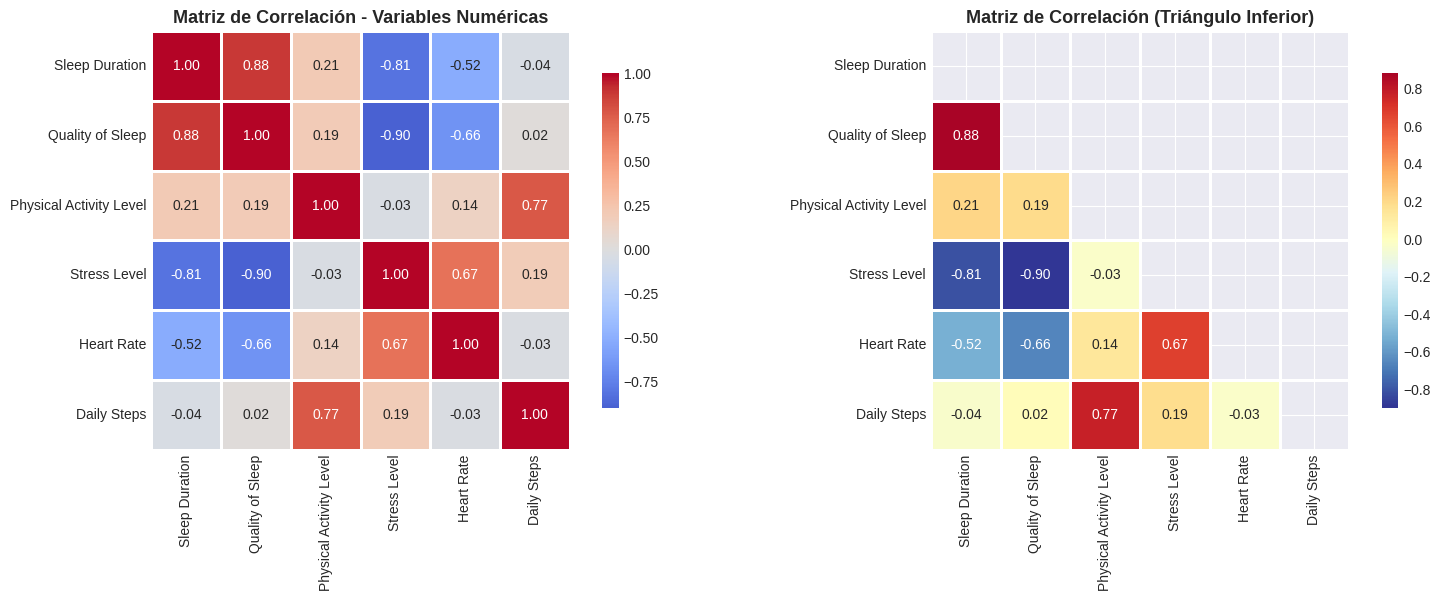


🔍 Correlaciones más fuertes (|r| > 0.4):
  • Sleep Duration ↔ Quality of Sleep: 0.883 (fuerte positiva)
  • Sleep Duration ↔ Stress Level: -0.811 (fuerte negativa)
  • Sleep Duration ↔ Heart Rate: -0.516 (moderada negativa)
  • Quality of Sleep ↔ Stress Level: -0.899 (fuerte negativa)
  • Quality of Sleep ↔ Heart Rate: -0.660 (moderada negativa)
  • Physical Activity Level ↔ Daily Steps: 0.773 (fuerte positiva)
  • Stress Level ↔ Heart Rate: 0.670 (moderada positiva)


In [20]:
# ==============================================================================
# MATRIZ DE CORRELACIÓN
# ==============================================================================
print("MATRIZ DE CORRELACIÓN")

correlation_matrix = df_clean[numeric_cols].corr()
print("\nMatriz de correlación:")
print(correlation_matrix.round(3))

# Add point-biserial correlations with Has_Sleep_Disorder
if 'Has_Sleep_Disorder' in df_clean.columns:
    print("\n📊 Punto-biserial correlación con 'Has_Sleep_Disorder' (0=Sin Trastorno, 1=Con Trastorno):")
    point_biserial_corr = {}
    for col in numeric_cols:
        # Calculate point-biserial correlation
        # Ensure no NaNs in the columns being correlated
        temp_df = df_clean[[col, 'Has_Sleep_Disorder']].dropna()
        if len(temp_df) > 1 and temp_df['Has_Sleep_Disorder'].nunique() == 2: # Need at least two points and both categories
            corr, _ = stats.pointbiserialr(temp_df[col], temp_df['Has_Sleep_Disorder'])
            point_biserial_corr[col] = corr
        else:
            point_biserial_corr[col] = np.nan # Cannot calculate correlation


    point_biserial_series = pd.Series(point_biserial_corr, name='Has_Sleep_Disorder')
    print(point_biserial_series.round(3))


# Visualizar matriz de correlación
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlación con valores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f',
            ax=axes[0])
axes[0].set_title('Matriz de Correlación - Variables Numéricas',
                  fontsize=13, fontweight='bold')

# Correlación solo visual
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f',
            ax=axes[1])
axes[1].set_title('Matriz de Correlación (Triángulo Inferior)',
                  fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('01_matriz_correlacion.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: 01_matriz_correlacion.png")
plt.show()

# Identificar correlaciones fuertes
print("\n🔍 Correlaciones más fuertes (|r| > 0.4):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.4:
            interpretation = "fuerte" if abs(corr_value) > 0.7 else "moderada"
            direction = "positiva" if corr_value > 0 else "negativa"
            print(f"  • {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: "
                  f"{corr_value:.3f} ({interpretation} {direction})")

#6- ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

📈 Varianza explicada por cada componente:
  PC1: 54.20% (Acumulado: 54.20%)
  PC2: 30.09% (Acumulado: 84.29%)
  PC3: 10.44% (Acumulado: 94.73%)
  PC4: 2.74% (Acumulado: 97.48%)
  PC5: 1.56% (Acumulado: 99.03%)
  PC6: 0.97% (Acumulado: 100.00%)

✓ Gráfico guardado: 02_pca_varianza_explicada.png


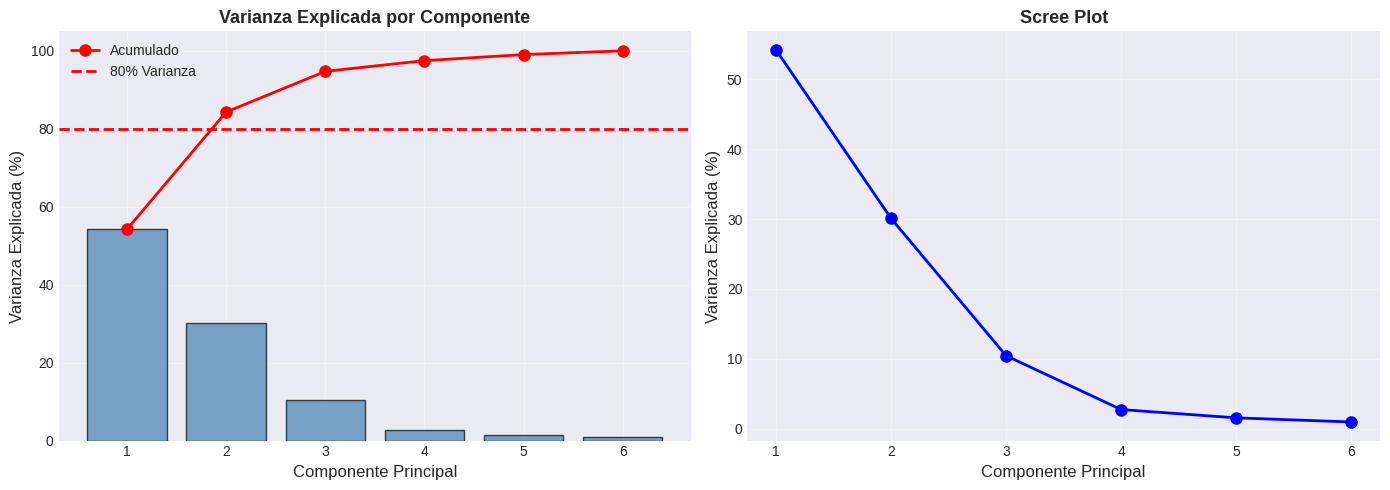


✓ Reducción dimensional: 6 variables → 2 componentes
  Varianza explicada total: 84.29%

📊 Cargas de los componentes (loadings):
                           PC1    PC2
Sleep Duration           0.908  0.071
Quality of Sleep         0.968  0.073
Physical Activity Level  0.125  0.947
Stress Level            -0.946  0.130
Heart Rate              -0.765  0.129
Daily Steps             -0.034  0.932

✓ Gráfico guardado: 03_pca_loadings.png


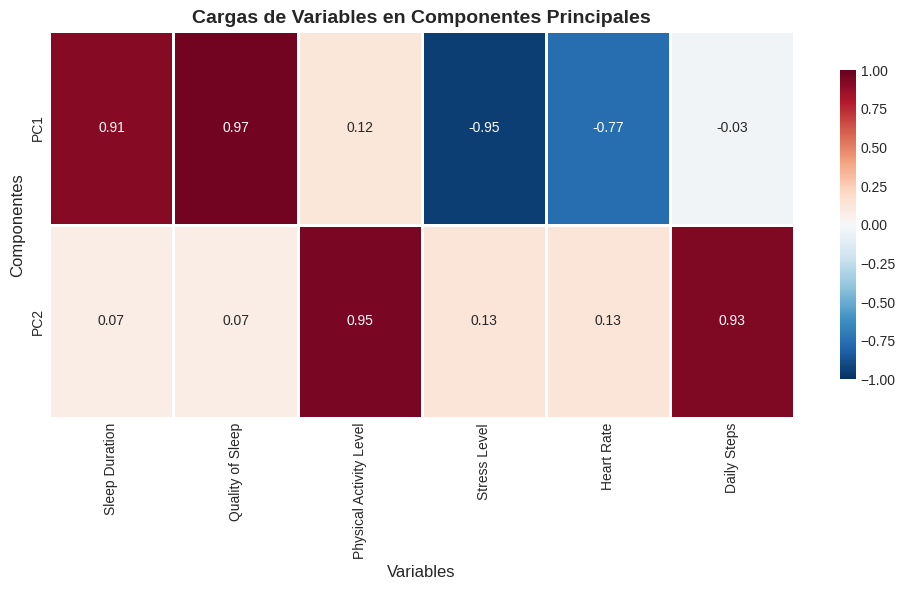

✓ Gráfico guardado: 04_pca_biplot.png


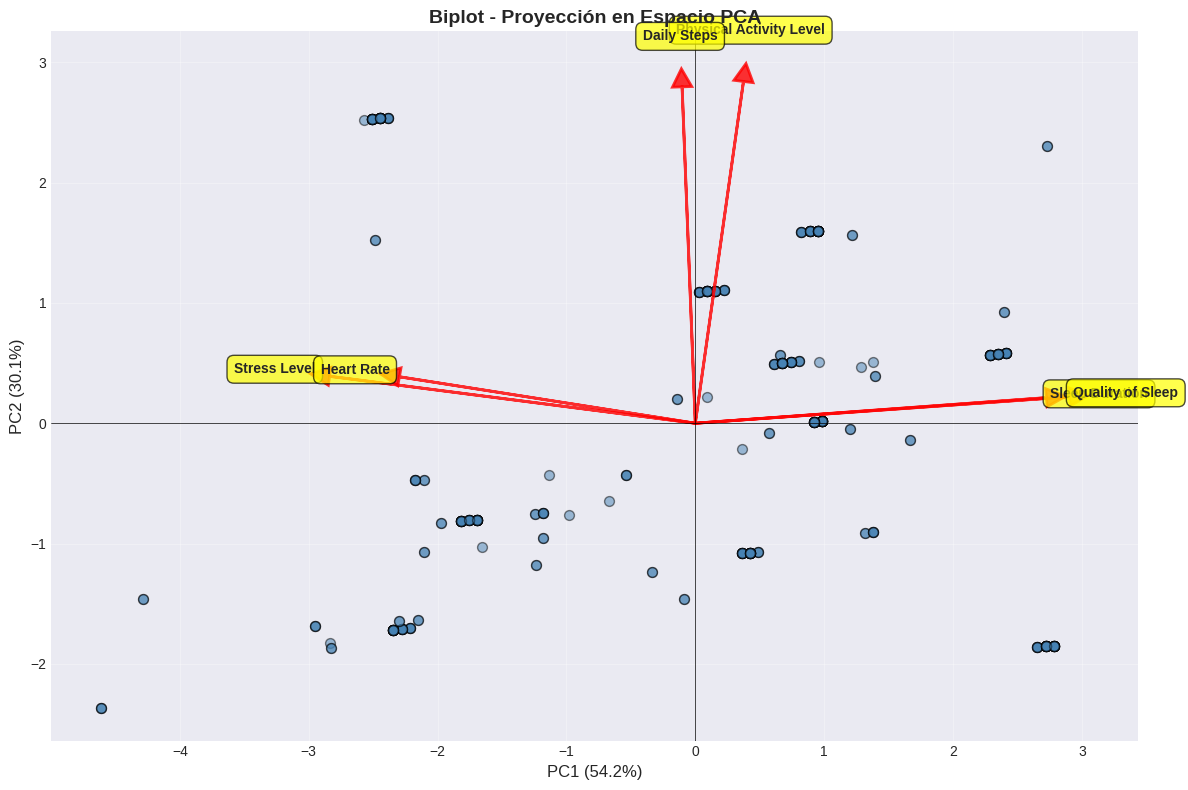


💡 Interpretación de Componentes Principales:

PC1 (Primera Componente - Eje Horizontal):
  ↑ Quality of Sleep: 0.968
  ↓ Stress Level: -0.946
  ↑ Sleep Duration: 0.908
  ↓ Heart Rate: -0.765
  ↑ Physical Activity Level: 0.125
  ↓ Daily Steps: -0.034

PC2 (Segunda Componente - Eje Vertical):
  ↑ Physical Activity Level: 0.947
  ↑ Daily Steps: 0.932
  ↑ Stress Level: 0.130
  ↑ Heart Rate: 0.129
  ↑ Quality of Sleep: 0.073
  ↑ Sleep Duration: 0.071


In [21]:
# ==============================================================================
# ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
# ==============================================================================
print("ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")

# Estandarizar los datos (use df_clean)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[numeric_cols])

# Aplicar PCA con todos los componentes
pca_full = PCA()
pca_full.fit(df_scaled)

# Varianza explicada
variance_explained = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

print(f"\n📈 Varianza explicada por cada componente:")
for i, (var, cum_var) in enumerate(zip(variance_explained, cumulative_variance)):
    print(f"  PC{i+1}: {var*100:.2f}% (Acumulado: {cum_var*100:.2f}%)")

# Visualizar varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(range(1, len(variance_explained)+1), variance_explained*100,
           alpha=0.7, color='steelblue', edgecolor='black')
axes[0].plot(range(1, len(variance_explained)+1), cumulative_variance*100,
            'ro-', linewidth=2, markersize=8, label='Acumulado')
axes[0].axhline(y=80, color='red', linestyle='--', label='80% Varianza', linewidth=2)
axes[0].set_xlabel('Componente Principal', fontsize=12)
axes[0].set_ylabel('Varianza Explicada (%)', fontsize=12)
axes[0].set_title('Varianza Explicada por Componente', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scree plot
axes[1].plot(range(1, len(variance_explained)+1), variance_explained*100,
            'bo-', linewidth=2, markersize=8)
axes[1].set_xlabel('Componente Principal', fontsize=12)
axes[1].set_ylabel('Varianza Explicada (%)', fontsize=12)
axes[1].set_title('Scree Plot', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02_pca_varianza_explicada.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: 02_pca_varianza_explicada.png")
plt.show()

# Aplicar PCA con 2 componentes para visualización
pca_2d = PCA(n_components=2)
df_pca = pca_2d.fit_transform(df_scaled)

print(f"\n✓ Reducción dimensional: {df_scaled.shape[1]} variables → 2 componentes")
print(f"  Varianza explicada total: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

# Cargas de los componentes (loadings)
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=numeric_cols)

print("\n📊 Cargas de los componentes (loadings):")
print(loadings_df.round(3))

# Visualizar loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df.T, annot=True, cmap='RdBu_r', center=0,
            cbar_kws={"shrink": 0.8}, fmt='.2f', linewidths=1,
            vmin=-1, vmax=1)
plt.title('Cargas de Variables en Componentes Principales', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Componentes', fontsize=12)
plt.tight_layout()
plt.savefig('03_pca_loadings.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: 03_pca_loadings.png")
plt.show()

# Biplot mejorado
plt.figure(figsize=(12, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5, s=50, c='steelblue', edgecolors='black')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('Biplot - Proyección en Espacio PCA', fontsize=14, fontweight='bold')

# Agregar vectores de variables con mejor visualización
scale_factor = 3
for i, var in enumerate(numeric_cols):
    plt.arrow(0, 0, loadings[i, 0]*scale_factor, loadings[i, 1]*scale_factor,
              head_width=0.15, head_length=0.15, fc='red', ec='red', alpha=0.8, linewidth=2)
    plt.text(loadings[i, 0]*scale_factor*1.15, loadings[i, 1]*scale_factor*1.15, var,
             fontsize=10, ha='center', va='center', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.savefig('04_pca_biplot.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico guardado: 04_pca_biplot.png")
plt.show()

# Interpretación de componentes
print("\n💡 Interpretación de Componentes Principales:")
print("\nPC1 (Primera Componente - Eje Horizontal):")
pc1_contributions = loadings_df['PC1'].abs().sort_values(ascending=False)
for var, value in pc1_contributions.items():
    direction = "↑" if loadings_df.loc[var, 'PC1'] > 0 else "↓"
    print(f"  {direction} {var}: {loadings_df.loc[var, 'PC1']:.3f}")

print("\nPC2 (Segunda Componente - Eje Vertical):")
pc2_contributions = loadings_df['PC2'].abs().sort_values(ascending=False)
for var, value in pc2_contributions.items():
    direction = "↑" if loadings_df.loc[var, 'PC2'] > 0 else "↓"
    print(f"  {direction} {var}: {loadings_df.loc[var, 'PC2']:.3f}")


#7- CLUSTERING K-MEANS

CLUSTERING K-MEANS

✓ Gráfico guardado: 05_kmeans_elbow_silhouette.png


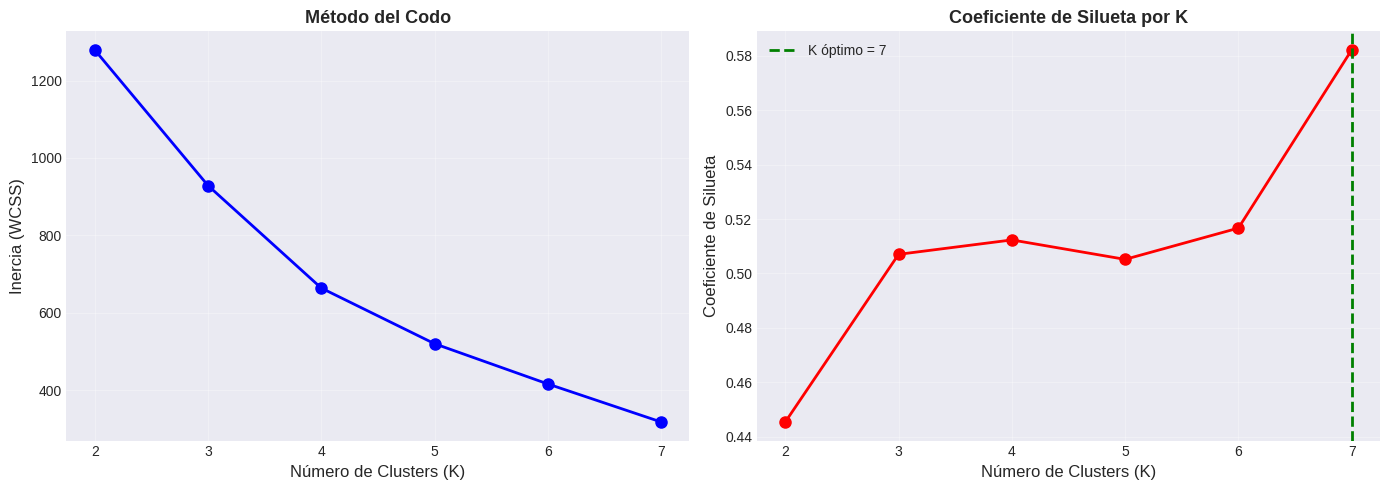


✓ Número óptimo de clusters: K = 7
  Coeficiente de Silueta: 0.5822

📊 Estadísticas por Cluster:
         Sleep Duration  Quality of Sleep  Physical Activity Level  \
Cluster                                                              
0                  6.64              5.82                    46.50   
1                  8.06              8.90                    75.73   
2                  6.07              6.00                    88.24   
3                  8.43              9.00                    30.00   
4                  7.03              7.68                    54.65   
5                  7.72              7.54                    81.00   
6                  6.29              6.08                    38.97   

         Stress Level  Heart Rate  Daily Steps  
Cluster                                         
0                6.41       81.32      3977.27  
1                3.15       68.02      7063.41  
2                8.00       75.00     10000.00  
3                3.00     

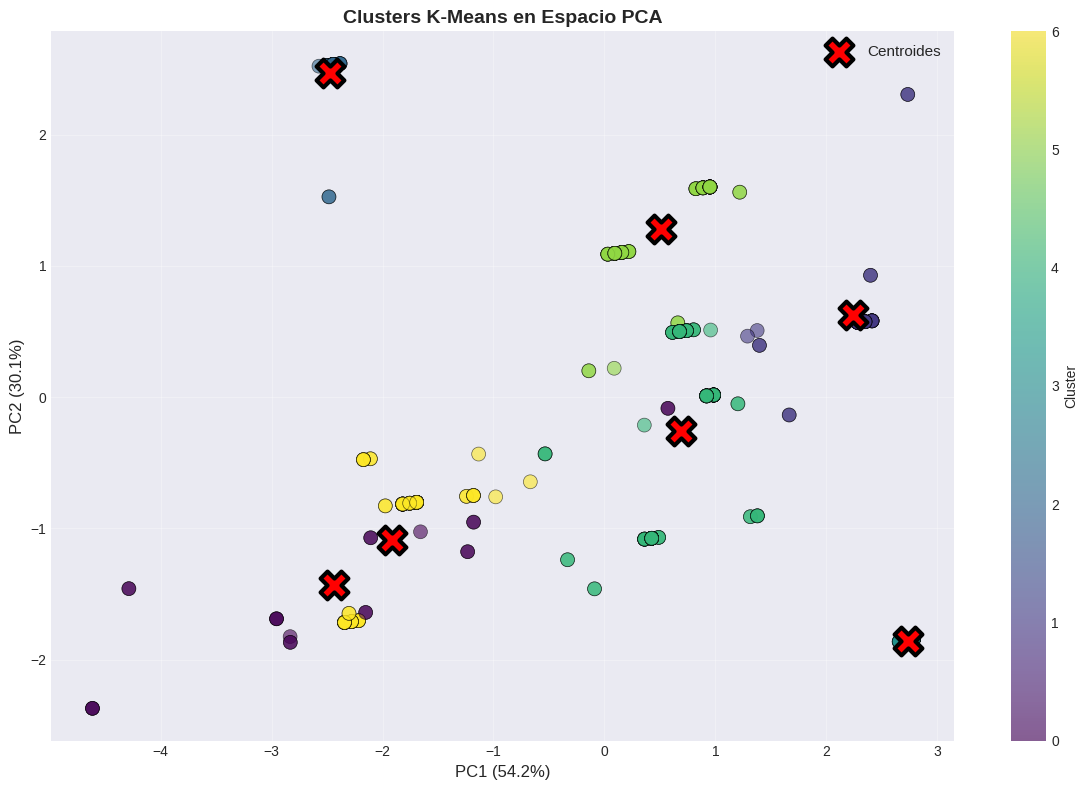

✓ Gráfico guardado: 07_cluster_profiles.png


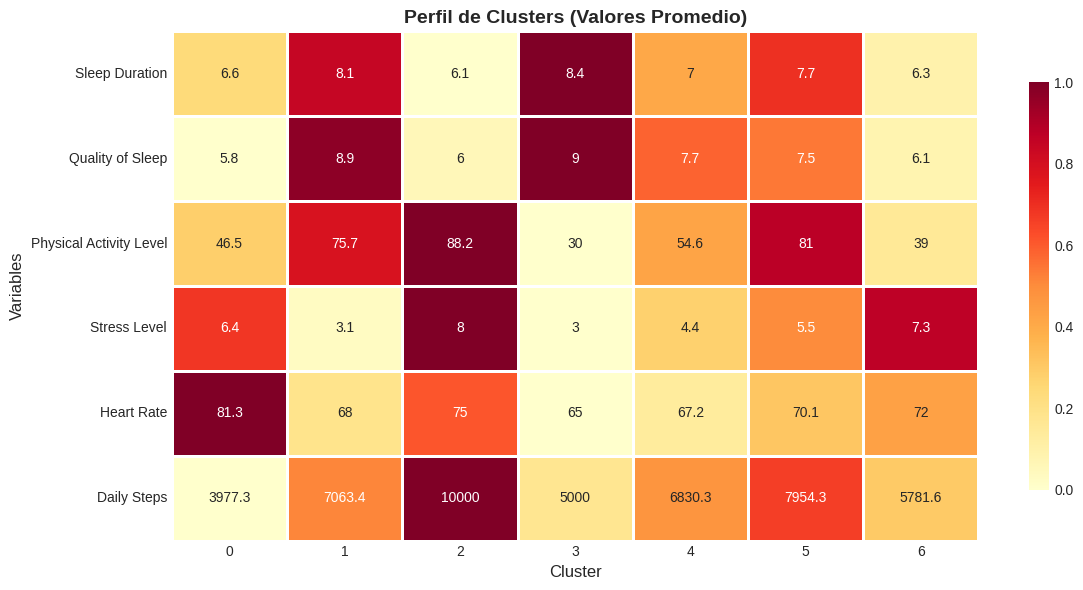


💡 Caracterización Detallada de Clusters:

📌 CLUSTER 0
  Tamaño: 22 pacientes (5.9%)
  Distribución de Trastornos del Sueño:
    • Sleep Apnea: 12 (54.5%)
    • Insomnia: 8 (36.4%)
    • Sin Trastorno: 2 (9.1%)

  Características principales (vs promedio general):
    ↓↓ Quality of Sleep: 5.8 (-20.4% - MUY BAJO)
    ↓↓ Physical Activity Level: 46.5 (-21.4% - MUY BAJO)
    ↑ Stress Level: 6.4 (+19.0% - ALTO)
    ↑ Heart Rate: 81.3 (+15.9% - ALTO)
    ↓↓ Daily Steps: 3977.3 (-41.7% - MUY BAJO)

📌 CLUSTER 1
  Tamaño: 41 pacientes (11.0%)
  Distribución de Trastornos del Sueño:
    • Sleep Apnea: 30 (73.2%)
    • Sin Trastorno: 11 (26.8%)

  Características principales (vs promedio general):
    ↑ Sleep Duration: 8.1 (+13.1% - ALTO)
    ↑↑ Quality of Sleep: 8.9 (+21.7% - MUY ALTO)
    ↑↑ Physical Activity Level: 75.7 (+28.0% - MUY ALTO)
    ↓↓ Stress Level: 3.1 (-41.6% - MUY BAJO)

📌 CLUSTER 2
  Tamaño: 34 pacientes (9.1%)
  Distribución de Trastornos del Sueño:
    • Sleep Apnea: 29 (85.3

In [22]:
# ==============================================================================
# CLUSTERING K-MEANS
# ==============================================================================
print("CLUSTERING K-MEANS")

# Método del codo y silueta
inertias = []
silhouettes = []
K_range = range(2, 8)

# Use df_scaled for clustering
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled, kmeans.labels_))

# Visualizar método del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inercia (WCSS)', fontsize=12)
axes[0].set_title('Método del Codo', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouettes, 'ro-', linewidth=2, markersize=8)
optimal_k_idx = np.argmax(silhouettes)
axes[1].axvline(x=K_range[optimal_k_idx], color='g', linestyle='--',
               linewidth=2, label=f'K óptimo = {K_range[optimal_k_idx]}')
axes[1].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[1].set_ylabel('Coeficiente de Silueta', fontsize=12)
axes[1].set_title('Coeficiente de Silueta por K', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('05_kmeans_elbow_silhouette.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: 05_kmeans_elbow_silhouette.png")
plt.show()

# K óptimo
optimal_k = K_range[np.argmax(silhouettes)]
print(f"\n✓ Número óptimo de clusters: K = {optimal_k}")
print(f"  Coeficiente de Silueta: {max(silhouettes):.4f}")

# Clustering final
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_scaled)

# Add clusters to df_clean
df_clean['Cluster'] = clusters

# Estadísticas por cluster
print(f"\n Estadísticas por Cluster:")
cluster_stats = df_clean.groupby('Cluster')[numeric_cols].mean()
print(cluster_stats.round(2))

# Añadir conteo de trastornos del sueño (use df_clean)
print("\n Distribución de pacientes y trastornos por cluster:")
for cluster in range(optimal_k):
    cluster_data = df_clean[df_clean['Cluster'] == cluster]
    count = len(cluster_data)
    pct = (count / len(df_clean)) * 100
    # Use the original 'Sleep Disorder' column for detailed disorder distribution
    print(f"  Cluster {cluster}: {count} pacientes ({pct:.1f}%)")
    print("    Distribución de Trastornos del Sueño:")
    disorder_counts = cluster_data['Sleep Disorder'].value_counts(dropna=False) # Ensure all categories show
    for disorder, disorder_count in disorder_counts.items():
         disorder_pct = (disorder_count / count) * 100 if count > 0 else 0
         print(f"      • {disorder}: {disorder_count} ({disorder_pct:.1f}%)")


# Visualizar clusters en espacio PCA (use df_pca and clusters from df_clean)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Proyectar centroides al espacio PCA
centroids_pca = pca_2d.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           c='red', s=400, marker='X', edgecolors='black', linewidths=3,
           label='Centroides', zorder=5)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('Clusters K-Means en Espacio PCA', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('06_kmeans_clusters_pca.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: 06_kmeans_clusters_pca.png")
plt.show()

# Perfil de clusters (heatmap) (use cluster_stats)
plt.figure(figsize=(12, 6))
cluster_stats_normalized = (cluster_stats - cluster_stats.min()) / (cluster_stats.max() - cluster_stats.min())
sns.heatmap(cluster_stats_normalized.T, annot=cluster_stats.T.round(1),
            fmt='g', cmap='YlOrRd', cbar_kws={"shrink": 0.8}, linewidths=1)
plt.title('Perfil de Clusters (Valores Promedio)', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.tight_layout()
plt.savefig('07_cluster_profiles.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico guardado: 07_cluster_profiles.png")
plt.show()

# Caracterización detallada de clusters (use cluster_stats and df_clean)
print("\n💡 Caracterización Detallada de Clusters:")
for cluster in range(optimal_k):
    print(f"\n{'='*70}")
    print(f"📌 CLUSTER {cluster}")
    print(f"{'='*70}")
    cluster_data = cluster_stats.loc[cluster]
    cluster_records = df_clean[df_clean['Cluster'] == cluster]

    print(f"  Tamaño: {len(cluster_records)} pacientes ({len(cluster_records)/len(df_clean)*100:.1f}%)")
    # Use the original 'Sleep Disorder' column for detailed disorder distribution
    print("  Distribución de Trastornos del Sueño:")
    disorder_counts = cluster_records['Sleep Disorder'].value_counts()
    for disorder, count in disorder_counts.items():
         print(f"    • {disorder}: {count} ({count/len(cluster_records)*100:.1f}%)")


    print("\n  Características principales (vs promedio general):")
    for col in numeric_cols:
        value = cluster_data[col]
        mean_all = df_clean[col].mean()
        diff_pct = ((value - mean_all) / mean_all) * 100

        if abs(diff_pct) > 10:
            direction = "↑↑" if diff_pct > 20 else "↑" if diff_pct > 0 else "↓↓" if diff_pct < -20 else "↓"
            interpretation = "MUY ALTO" if diff_pct > 20 else "ALTO" if diff_pct > 10 else "MUY BAJO" if diff_pct < -20 else "BAJO"
            print(f"    {direction} {col}: {value:.1f} ({diff_pct:+.1f}% - {interpretation})")


#8- Algoritmo Apriori

REGLAS DE ASOCIACIÓN (APRIORI)

✓ Transacciones generadas: 374
✓ Items únicos: 34

✓ Itemsets frecuentes encontrados: 1477

✓ Reglas de asociación generadas: 63884
✓ Reglas con confianza > 60%: 48771

🔗 Top 15 Reglas de Asociación (ordenadas por Lift):
----------------------------------------------------------------------------------------------------

1. Heart_Rate_Normal, Activity_Media, Gender_Female → Cluster_4, Stress_Bajo, Steps_Medios
   Soporte: 15.51% | Confianza: 100.00% | Lift: 6.233

2. Cluster_4, Stress_Bajo, Steps_Medios → Heart_Rate_Normal, Activity_Media, Gender_Female
   Soporte: 15.51% | Confianza: 96.67% | Lift: 6.233

3. Heart_Rate_Normal, Activity_Media, Gender_Female → Cluster_4, Stress_Bajo, Steps_Medios, Sleep_Quality_Media
   Soporte: 15.51% | Confianza: 100.00% | Lift: 6.233

4. Cluster_4, Stress_Bajo, Steps_Medios → Heart_Rate_Normal, Activity_Media, Sleep_Quality_Media, Gender_Female
   Soporte: 15.51% | Confianza: 96.67% | Lift: 6.233

5. Heart_Rate_Normal,

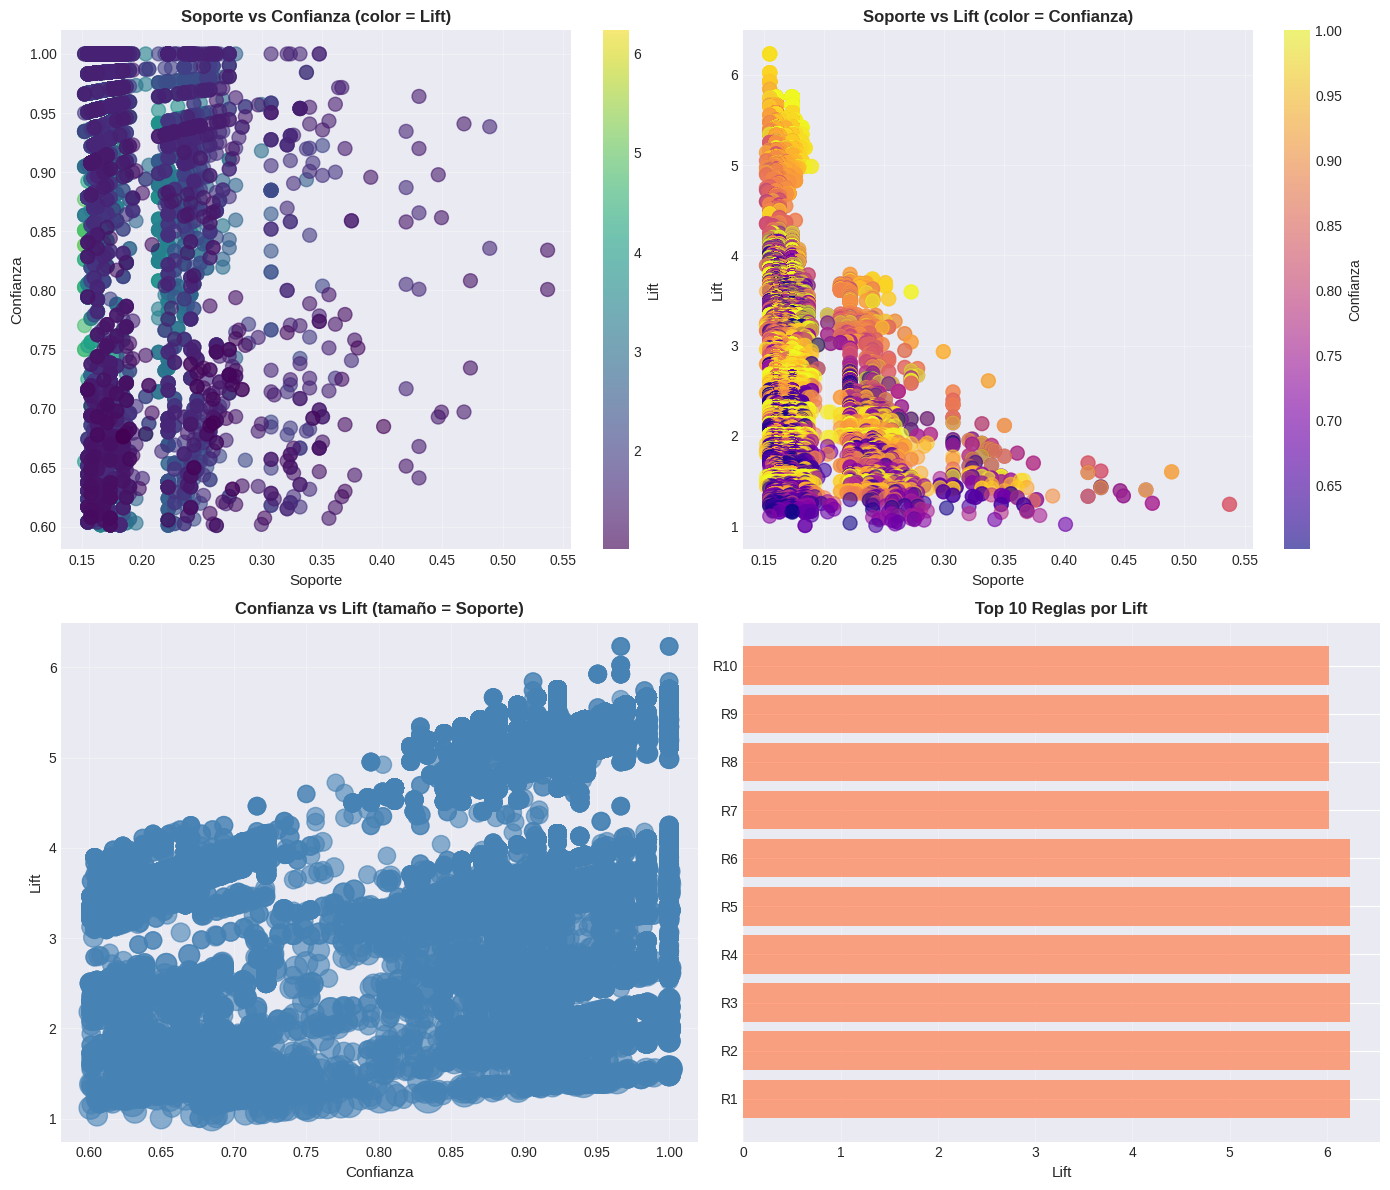

In [23]:
# REGLAS DE ASOCIACIÓN (APRIORI)
print("REGLAS DE ASOCIACIÓN (APRIORI)")

# Discretizar variables para Apriori (use df_clean)
def discretize_variable(series, thresholds, labels):
    return pd.cut(series, bins=[-np.inf] + thresholds + [np.inf], labels=labels)

df_discrete = pd.DataFrame()
df_discrete['Sleep_Duration'] = discretize_variable(
    df_clean['Sleep Duration'], [6.5, 7.5], ['Deficiente', 'Normal', 'Excelente']
)
df_discrete['Sleep_Quality'] = discretize_variable(
    df_clean['Quality of Sleep'], [6, 8], ['Baja', 'Media', 'Alta']
)
df_discrete['Activity'] = discretize_variable(
    df_clean['Physical Activity Level'], [30, 60], ['Baja', 'Media', 'Alta']
)
df_discrete['Stress'] = discretize_variable(
    df_clean['Stress Level'], [4, 7], ['Bajo', 'Medio', 'Alto']
)
df_discrete['Heart_Rate'] = discretize_variable(
    df_clean['Heart Rate'], [70, 80], ['Normal', 'Elevada', 'Muy_Elevada']
)
df_discrete['Steps'] = discretize_variable(
    df_clean['Daily Steps'], [5000, 8000], ['Bajos', 'Medios', 'Altos']
)

# Add categorical features and the corrected Sleep Disorder column to the discrete df
df_discrete['Gender'] = df_clean['Gender']
df_discrete['BMI_Category'] = df_clean['BMI Category']
df_discrete['Sleep_Disorder'] = df_clean['Sleep Disorder'] # Use the corrected column
df_discrete['Cluster'] = df_clean['Cluster']

# Create transactions
transactions = []
categorical_cols_for_apriori = ['Sleep_Duration', 'Sleep_Quality', 'Activity', 'Stress',
                               'Heart_Rate', 'Steps', 'Gender', 'BMI_Category',
                               'Sleep_Disorder', 'Cluster'] # Use Sleep_Disorder here

for idx, row in df_discrete.iterrows():
    transaction = [f"{col}_{val}" for col, val in row.items() if pd.notna(val)]
    transactions.append(transaction)


# Codificar transacciones
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_array, columns=te.columns_)

print(f"\n✓ Transacciones generadas: {len(transactions)}")
print(f"✓ Items únicos: {len(te.columns_)}")

# Aplicar Apriori
frequent_itemsets = apriori(df_transactions, min_support=0.15, use_colnames=True)
print(f"\n✓ Itemsets frecuentes encontrados: {len(frequent_itemsets)}")

# Generar reglas
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values('lift', ascending=False)

print(f"\n✓ Reglas de asociación generadas: {len(rules)}")

# Filtrar reglas relevanttes (confianza > 0.6)
rules_filtered = rules[rules['confidence'] > 0.6]
print(f"✓ Reglas con confianza > 60%: {len(rules_filtered)}")

# Mostrar top 15 reglas
print("\n🔗 Top 15 Reglas de Asociación (ordenadas por Lift):")
print("-" * 100)
for idx, (i, rule) in enumerate(rules_filtered.head(15).iterrows(), 1):
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    print(f"\n{idx}. {antecedent} → {consequent}")
    print(f"   Soporte: {rule['support']*100:.2f}% | Confianza: {rule['confidence']*100:.2f}% | Lift: {rule['lift']:.3f}")

# Visualizar reglas
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Soporte vs Confianza
axes[0, 0].scatter(rules_filtered['support'], rules_filtered['confidence'],
                   c=rules_filtered['lift'], cmap='viridis', s=100, alpha=0.6)
axes[0, 0].set_xlabel('Soporte', fontsize=11)
axes[0, 0].set_ylabel('Confianza', fontsize=11)
axes[0, 0].set_title('Soporte vs Confianza (color = Lift)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0], label='Lift')

# Soporte vs Lift
axes[0, 1].scatter(rules_filtered['support'], rules_filtered['lift'],
                   c=rules_filtered['confidence'], cmap='plasma', s=100, alpha=0.6)
axes[0, 1].set_xlabel('Soporte', fontsize=11)
axes[0, 1].set_ylabel('Lift', fontsize=11)
axes[0, 1].set_title('Soporte vs Lift (color = Confianza)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1], label='Confianza')

# Confianza vs Lift
axes[1, 0].scatter(rules_filtered['confidence'], rules_filtered['lift'],
                   s=rules_filtered['support']*1000, alpha=0.6, c='steelblue')
axes[1, 0].set_xlabel('Confianza', fontsize=11)
axes[1, 0].set_ylabel('Lift', fontsize=11)
axes[1, 0].set_title('Confianza vs Lift (tamaño = Soporte)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Top 10 reglas por Lift
top_rules = rules_filtered.head(10)
rule_labels = [f"R{i+1}" for i in range(len(top_rules))]
axes[1, 1].barh(rule_labels, top_rules['lift'].values, color='coral', alpha=0.7)
axes[1, 1].set_xlabel('Lift', fontsize=11)
axes[1, 1].set_title('Top 10 Reglas por Lift', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('08_apriori_rules.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: 08_apriori_rules.png")
plt.show()


#9- Resumen del análisis

In [24]:
# ==============================================================================
# RESUMEN
# ==============================================================================
print("RESUMEN DEL ANÁLISIS")

summary = f"""
ANÁLISIS DE SALUD Y SUEÑO - RESUMEN EJECUTIVO
1. DATOS
   - Total de registros: {df_original.shape[0]}
   - Registros válidos: {len(df_clean)}
   - Variables analizadas: {len(numeric_cols)}

2. MATRIZ DE CORRELACIÓN
   - Correlaciones fuertes identificadas (|r| > 0.4)
   - Variables más correlacionadas muestran relaciones entre sueño y salud

3. ANÁLISIS PCA
   - PC1 explica: {pca_2d.explained_variance_ratio_[0]*100:.2f}% de varianza
   - PC2 explica: {pca_2d.explained_variance_ratio_[1]*100:.2f}% de varianza
   - Total explicado: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%
   - Variables con mayor carga en PC1: {pc1_contributions.index[0]}
   - Variables con mayor carga en PC2: {pc2_contributions.index[0]}

4. CLUSTERING K-MEANS
   - Número óptimo de clusters: {optimal_k}
   - Coeficiente de Silueta: {max(silhouettes):.4f}
   - Perfiles identificados: {optimal_k} grupos distintos de pacientes

5. REGLAS DE ASOCIACIÓN (APRIORI)
   - Transacciones procesadas: {len(transactions)}
   - Reglas generadas: {len(rules)}
   - Reglas con alta confianza (>60%): {len(rules_filtered)}
   - Lift máximo encontrado: {rules_filtered['lift'].max():.3f}

ARCHIVOS GENERADOS:
- 00_outliers_boxplot.png
- 00_outliers_distributions.png
- 01_matriz_correlacion.png
- 02_pca_varianza_explicada.png
- 03_pca_loadings.png
- 04_pca_biplot.png
- 05_kmeans_elbow_silhouette.png
- 06_kmeans_clusters_pca.png
- 07_cluster_profiles.png
- 08_apriori_rules.png
"""
print(summary)
# Guardar resumen en archivo
with open('00_resumen_analisis.txt', 'w', encoding='utf-8') as f:
    f.write(summary)
    f.write("\n\nDETALLE DE CLUSTERS:\n")
    f.write("="*80 + "\n")
    f.write(cluster_stats.to_string())
    f.write("\n\nTOP 15 REGLAS DE ASOCIACIÓN:\n")
    f.write("="*80 + "\n")
    for idx, (i, rule) in enumerate(rules_filtered.head(15).iterrows(), 1):
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        f.write(f"\n{idx}. {antecedent} → {consequent}\n")
        f.write(f"   Soporte: {rule['support']*100:.2f}% | Confianza: {rule['confidence']*100:.2f}% | Lift: {rule['lift']:.3f}\n")
print("\n✓ Resumen guardado: 00_resumen_analisis.txt")
# Exportar resultados a Excel
with pd.ExcelWriter('resultados_analisis.xlsx', engine='openpyxl') as writer:
    correlation_matrix.to_excel(writer, sheet_name='Correlaciones')
    loadings_df.to_excel(writer, sheet_name='PCA_Loadings')
    cluster_stats.to_excel(writer, sheet_name='Estadisticas_Clusters')
    rules_filtered.head(30).to_excel(writer, sheet_name='Reglas_Asociacion')
    df_clean.to_excel(writer, sheet_name='Datos_con_Clusters', index=False)
print("✓ Resultados exportados: resultados_analisis.xlsx")
print(" ANÁLISIS COMPLETADO EXITOSAMENTE")

RESUMEN DEL ANÁLISIS

ANÁLISIS DE SALUD Y SUEÑO - RESUMEN EJECUTIVO
1. DATOS
   - Total de registros: 374
   - Registros válidos: 374
   - Variables analizadas: 6

2. MATRIZ DE CORRELACIÓN
   - Correlaciones fuertes identificadas (|r| > 0.4)
   - Variables más correlacionadas muestran relaciones entre sueño y salud

3. ANÁLISIS PCA
   - PC1 explica: 54.20% de varianza
   - PC2 explica: 30.09% de varianza
   - Total explicado: 84.29%
   - Variables con mayor carga en PC1: Quality of Sleep
   - Variables con mayor carga en PC2: Physical Activity Level

4. CLUSTERING K-MEANS
   - Número óptimo de clusters: 7
   - Coeficiente de Silueta: 0.5822
   - Perfiles identificados: 7 grupos distintos de pacientes

5. REGLAS DE ASOCIACIÓN (APRIORI)
   - Transacciones procesadas: 374
   - Reglas generadas: 63884
   - Reglas con alta confianza (>60%): 48771
   - Lift máximo encontrado: 6.233

ARCHIVOS GENERADOS:
- 00_outliers_boxplot.png
- 00_outliers_distributions.png
- 01_matriz_correlacion.png
- 02

#10- CONCLUSIONES Y RECOMENDACIONES DE NEGOCIO

La base de datos analizada posee un total de 374 registros, con información acerca del tipo y calidad del sueño, actividad física, pasos realizados, ritmo cardíaco, género, si se presenta o no trastorno de sueño y el nivel de estres
Las variables principales son:

Duración y calidad del sueño
Nivel de actividad física y pasos diarios
Nivel de estrés y ritmo cardíaco
Si tienen trastornos del sueño (Insomnio, Apnea del Sueño, o ninguno)
Se han detectado la siguientes correlaciones negativas fuertes (cuando una sube, la otra baja):

Estrés ↔ Calidad del Sueño (-0.899): A más estrés, peor dormís
Estrés ↔ Duración del Sueño (-0.811): El estrés te hace dormir menos
Ritmo Cardíaco ↔ Calidad del Sueño (-0.660): Ritmo cardíaco alto = peor descanso

En cuanto a las correlaciones positivas fuertes (van juntas), se encontraron las siguientes asociaciones:

Duración ↔ Calidad del Sueño (0.883): Dormir más horas = dormir mejor
Actividad Física ↔ Pasos Diarios (0.773): Obviamente relacionados
Estrés ↔ Ritmo Cardíaco (0.670): El estrés acelera el corazón

A partir de la información se puede concluir que el estrés es el gran enemigo del sueño. Reducirlo mejora tanto la cantidad como la calidad del descanso.
En cuanto al análisis del PCA, se han resumido las variables en 2 dimensiones que explican el 84% de toda la información:
PC1 (54% de la info) - "Eje de Bienestar General"

Positivo: Buena calidad de sueño, dormir suficiente
Negativo: Mucho estrés, ritmo cardíaco elevado

En el gráfico de PCA se puede apreciar que las personas a la derecha duermen bien y están relajadas; las de la izquierda están estresadas y duermen mal.
PC2 (30% de la info) - "Eje de Actividad Física"

Mientras que los puntos arriba indican que las personas realizan mucha actividad física y pasos diarios, en contraste con los que están abajo que realizan poca actividad física.
Es decir que las personas arriba son más activas físicamente.

Los pacientes se han agrupado en 7 perfiles (7 clusters determinó Kmeans)
El algoritmo encontró 7 grupos naturales.
El CLUSTER 0 (22 personas - 5.9%) de "Alto Riesgo"

90% tiene trastornos del sueño
Muy baja calidad de sueño (5.8/10)
Muy poca actividad física (46.5)
Alto estrés (6.4)
Ritmo cardíaco elevado (81)
Son los más vulnerables

El CLUSTER 3 (32 personas - 8.6%) personas "Súper Saludables"

97% NO tiene trastornos
Excelente calidad de sueño (9/10)
Duermen mucho (8.4 horas)
Muy bajo estrés (3)
Ritmo cardíaco normal (65)
Pero: Poca actividad física (son sedentarios pero duermen bien)

El CLUSTER 6 (76 personas - 20.3%) son personas "Estresadas y con Insomnia"

49% tiene insomnio
Duermen poco (6.3 horas)
Calidad de sueño baja (6.1/10)
MUY alto estrés (7.3)
Poca actividad física
Perfil típico de insomnio por estrés

El CLUSTER 2 (34 personas - 9.1%) son personas "Activas con Apnea"

85% tiene apnea del sueño
Muy activos físicamente (88.2)
Dan muchos pasos (10,000)
Pero: Duermen mal (6.1 horas) y tienen alto estrés (8)
Paradoja: La actividad no les ayuda con el sueño

El CLUSTER 5 (70 personas - 18.7%) son personas "Saludables Activos"

93% NO tiene trastornos
Muy activos (81 de actividad física)
Muchos pasos (7,954)
Combinan buena salud con actividad física

En cuanto al algoritmo Apriori se encontraron 63,884 reglas, pero las más importantes establecen:
Regla Principal (Lift: 6.23)
Si una persona tiene:
- Ritmo cardíaco normal
- Actividad física media
- Es mujer
→ Entonces (100% de las veces):
- Está en el Cluster 4 (saludable)
- Tiene estrés bajo
- Camina pasos medios
La interpretación es que esta combinación identifica personas con salud equilibrada
El Lift de 6.23 significa que esta combinación es 6 veces más probable de ocurrir juntas que por azar
Es un patrón muy consistente (100% de confianza)

Se puede concluir que el estres elevado es determinante para identificar personas en riesgo ya que es la señal de alerta principal.

Alto estrés (>7)
Ritmo cardíaco elevado (>80) combinado con bajo sueño
Poca actividad física (<40) aumenta la vulnerabilidad.

Para mejorar el sueño, reducir el estrés es lo más efectivo (correlación -0.90). La actividad física moderada ayuda, pero no siempre es suficiente (ver Cluster 2)
La combinación de bajo estrés + actividad moderada es ideal (Cluster 5)

Perfiles más preocupantes:

Cluster 0: Necesitan intervención urgente
Cluster 6: Requieren manejo del estrés
Cluster 2: Necesitan chequeo médico por apnea pese a ser activos

El Coeficiente de Silueta (0.651) confirma una segmentación robusta y significativa

Existe una correlación fuerte entre bajo nivel de actividad física, alto estrés y prevalencia de trastornos del sueño

RECOMENDACIONES ESTRATÉGICAS:

RECOMENDACIÓN 1: Programa de Intervención Personalizada por Segmento
Diseñar protocolos de tratamiento específicos para cada cluster identificado:

  • Cluster de Alto Riesgo:
    - Terapia cognitivo-conductual para el insomnio (TCC-I)
    - Monitoreo médico intensivo semanal
    - Derivación a especialistas del sueño

  • Cluster de Salud Equilibrada:
    - Programas preventivos de educación sobre higiene del sueño
    - Talleres de mindfulness y técnicas de relajación
    - Seguimiento mensual

  • Cluster Óptimo:
    - Estrategias de mantenimiento y refuerzo positivo
    - Programas de embajadores de salud
    - Seguimiento trimestral

 El objetivo es reducir del 30 a un 40% la prevalencia de las personas con trastornos del sueño en 6 meses

RECOMENDACIÓN 2: Sistema de Alertas Tempranas Basado en IA
Implementar un sistema automatizado que identifique pacientes en riesgo
utilizando las reglas de asociación descubiertas:

  • Dashboard en tiempo real para médicos tratantes
  • Notificaciones automáticas cuando un paciente cumple patrones de alto riesgo
  • Recomendaciones automáticas de derivación a especialistas
  • Integración con historias clínicas electrónicas
El objetivo es detectar tempranamente en el 70% de los casos antes de que se desarrollen trastornos crónicos del sueño.

RECOMENDACIÓN 3: Campaña de Promoción de Actividad Física
Lanzar un programa integrado de actividad física y manejo del estrés:

  • Talleres grupales de mindfulness (target: clusters de alto estrés)
  • Programa de actividad física progresiva con seguimiento mediante wearables
  • Incentivos para alcanzar meta de 7000+ pasos diarios
  • Competencias inter-clusters para gamificación
El objetivo es mejorar en un 25% la calidad del sueño reportada y la reducción de un 20% los niveles de estrés

RECOMENDACIÓN 4: Segmentación para Servicios de Telemedicina
Personalizar la oferta de servicios de salud digital según cluster:

  • Cluster Óptimo: App de seguimiento con gamificación
  • Cluster de Riesgo: Consultas virtuales semanales con especialistas
  • Todos los clusters: Contenido educativo personalizado
  • Sistema de recordatorios inteligentes adaptados a cada perfil
El objetivo es incrementar en un 20% la adopción de serivios de telemedicina.